In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import constants
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

$$
C_x=C_0\frac{v_i}{v_{t(p-p)}}2\sqrt{2}
$$

In [2]:
vr_lis=[0,0.2,0.4,0.6,0.8,1,3,5,7,9]
C_0=5000
marker_lis=['.','^','*','x','+']

data_vi=pd.read_csv('test_data.csv')
data_Cx=pd.DataFrame(columns=data_vi.columns)
for col in data_vi.columns[:2]:
    data_Cx[col]=data_vi[col]
for col in data_vi.columns[2:]:
    data_Cx[col]=C_0*data_vi[col]/data_vi['vt']*2*2**0.5
data_Cx    

,f,vt,vr_0,vr_0.2,vr_0.4,vr_0.6,vr_0.8,vr_1,vr_3,vr_5,vr_7,vr_9
0,30,100,10.295475,8.654987,8.315576,7.834743,7.509474,7.184205,5.628570,4.978032,4.652763,4.384062
1,30,150,10.550033,9.050967,8.372144,7.919596,7.467048,7.165349,5.600286,5.072313,4.657477,4.261497
2,30,200,11.179358,9.432804,8.732769,8.266078,7.785246,7.467048,5.833631,5.161880,4.772971,4.511341
3,20,200,11.433917,9.623723,8.909545,8.421642,7.919596,7.594327,5.925555,5.239661,4.836610,4.567910
4,10,200,11.935962,9.948992,9.185317,8.662058,8.152941,7.806459,6.088189,5.381083,4.949747,4.673976


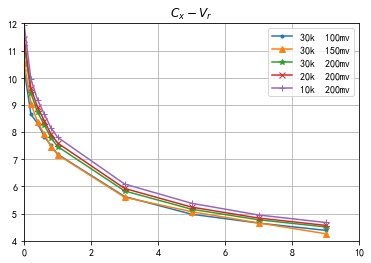

In [3]:
plt.grid()
plt.xlim(0,10)
plt.ylim(4,12)
plt.title('$C_x-V_r$')
for i in range(5):
    plt.plot(vr_lis,data_Cx.iloc[i].values[2:],marker=marker_lis[i],label='%ik  %imv'%(data_Cx['f'][i],data_Cx['vt'][i]))
plt.legend()
plt.show()

曲线大致与
$$
\frac{C_x}{A}=\left[\frac{q\varepsilon\varepsilon_0N_D}{2(V_D+V_r)}\right]^2
$$
相符，则由上公式得到
$$
C_x^{-2}=\frac{2(V_D+V_r)}{q\varepsilon\varepsilon_0N_DA^2}
$$
对其作***一元线性回归***，令  $y=bx+a\quad(y=C_x^{-2},x=V_r)$

In [4]:
data_Cx_2=pd.DataFrame(columns=data_Cx.columns)
for col in data_Cx.columns[:2]:
    data_Cx_2[col]=data_Cx[col]
for col in data_Cx.columns[2:]:
    data_Cx_2[col]=data_Cx[col]**-2
data_Cx_2

,f,vt,vr_0,vr_0.2,vr_0.4,vr_0.6,vr_0.8,vr_1,vr_3,vr_5,vr_7,vr_9
0,30,100,0.009434,0.013350,0.014462,0.016291,0.017733,0.019375,0.031565,0.040354,0.046193,0.052029
1,30,150,0.008984,0.012207,0.014267,0.015944,0.017935,0.019477,0.031885,0.038868,0.046100,0.055065
2,30,200,0.008001,0.011239,0.013113,0.014635,0.016499,0.017935,0.029385,0.037530,0.043896,0.049135
3,20,200,0.007649,0.010797,0.012598,0.014100,0.015944,0.017339,0.028480,0.036424,0.042748,0.047925
4,10,200,0.007019,0.010103,0.011853,0.013328,0.015044,0.016409,0.026979,0.034535,0.040816,0.045775


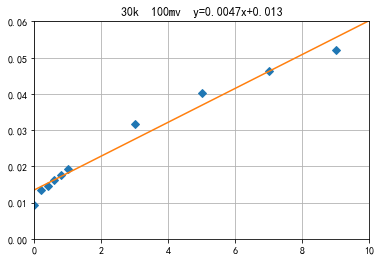

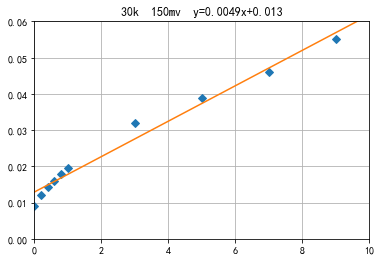

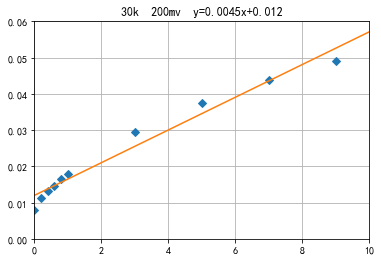

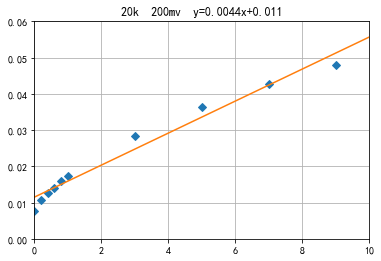

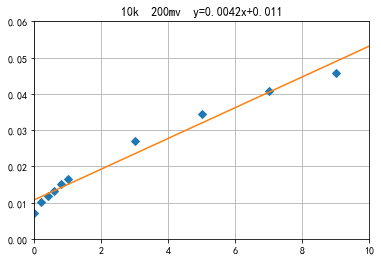

In [5]:
fit_lis=pd.DataFrame(columns=data_Cx_2.columns[:2])
for col in data_Cx_2.columns[:2]:
    fit_lis[col]=data_Cx_2[col]
for i in range(5):
    plt.xlim(0,10)
    plt.ylim(0,0.06)
    plt.grid()
    plt.plot(vr_lis,data_Cx_2.iloc[i][2:],linestyle='',marker='D')
    fit=np.polyfit(vr_lis,data_Cx_2.iloc[i][2:],1)
    fit_lis.loc[i,['b','a']]=fit[0],fit[1]
    x=np.linspace(0,10,100)
    y=np.polyval(fit,x)
    plt.title('%ik  %imv  y=%.2gx+%.2g'%(data_Cx_2['f'][i],data_Cx_2['vt'][i],fit[0],fit[1]))
    plt.plot(x,y)
    plt.show()

In [6]:
fit_lis

,f,vt,b,a
0,30,100,0.004670,0.013468
1,30,150,0.004886,0.012882
2,30,200,0.004512,0.011953
3,20,200,0.004417,0.011476
4,10,200,0.004239,0.010741


因为
$$
y=bx+a\quad(y=C_x^{-2},x=V_r)\\
\left.
\begin{array}{a}
a=\frac{2V_D}{q\varepsilon\varepsilon_0N_DA^2}\\
b=\frac{2}{q\varepsilon\varepsilon_0N_DA^2}
\end{array}
\right\}
\Rightarrow
\left\{
\begin{align}
N_D&=\frac{2}{bA^2q\varepsilon\varepsilon_0}\\
V_D&=\frac ab
\end{align}
\right.
$$
其中 $q=1.6\times10^{-19}c\qquad\varepsilon=11.8\qquad\varepsilon_0=8.854\times10^{-14}F/cm\qquad A\approx0.05^2\pi cm^2$

In [7]:
q=constants.electron_volt
print('q=',q)
epsilon=11.8
print('epsilon=',epsilon)
epsilon_0=constants.epsilon_0/100
print('epsilon_0=',epsilon_0)
A=0.05**2*constants.pi
print('A=',A)
res_lis=pd.DataFrame(columns=fit_lis.columns[:2])
for col in fit_lis.columns[:2]:
    res_lis[col]=fit_lis[col]
for i in range(5):
    res_lis.loc[i,'vd']=fit_lis.loc[i,'a']/fit_lis.loc[i,'b']
    res_lis.loc[i,'nd']=2/(fit_lis.loc[i,'b']*A**2*q*epsilon*epsilon_0)
res_lis

q= 1.602176634e-19
epsilon= 11.8
epsilon_0= 8.854187812800001e-14
A= 0.007853981633974483


,f,vt,vd,nd
0,30,100,2.883796,4.147202e+37
1,30,150,2.636568,3.964406e+37
2,30,200,2.649025,4.292439e+37
3,20,200,2.598302,4.385525e+37
4,10,200,2.534078,4.569494e+37


In [14]:
vd_avg=res_lis['vd'].mean()
nd_avg=res_lis['nd'].mean()
print('vd_avg=',vd_avg)
print('nd_avg=',nd_avg)

vd_avg= 2.66035383227723
nd_avg= 4.271813326252802e+37


$$
\begin{align}
\overline{V_d}&=2.66\\
\overline{N_d}&=4.27\times10^{37}
\end{align}
$$